In [1]:
install.packages("viridis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [2]:
install.packages("tidyverse")
install.packages("umap")
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘RcppEigen’, ‘reticulate’, ‘Rcpp’, ‘RSpectra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
system("unzip data.zip")

In [7]:
# Install and load required libraries if not already installed

library(tidyverse)
library(umap)
library(Rtsne)

In [8]:
# Install and load the tidyverse package if not already installed
# install.packages("tidyverse")
library(tidyverse)

# Read a TSV file with tab as delimiter
data  <- read.table("data.tsv", header = TRUE, sep = "\t")

In [9]:
rownames(data) = data$X
x = t(data)
df = x[-1,]
df = subset(data, select = -c(X))
data = t(df)
head(data)

,AL627309.1,AL627309.5,LINC01409,LINC01128,LINC00115,FAM41C,AL645608.2,NOC2L,KLHL17,PLEKHN1,⋯,MT-ND4,MT-ND5,MT-ND6,MT-CYB,MAFIP,AL354822.1,AL592183.1,AC240274.1,AC004556.3,AC007325.4
AATCACGAGCAGCCCT.1,0,0,0,0,0,0,0,0,0,0,⋯,20,1,1,23,0,0,0,0,0,0
AATCACGAGGAACTCG.1,0,0,0,0,0,0,0,0,0,0,⋯,38,4,0,31,0,0,0,0,0,0
AATCACGCACTACCGG.1,0,0,0,0,0,0,0,0,0,0,⋯,31,8,0,28,0,0,0,0,0,0
AATCACGCATGAATAG.1,0,0,0,0,0,0,0,0,0,0,⋯,14,3,5,22,0,0,0,0,0,0
AATCACGGTATAGGAT.1,0,0,0,0,0,0,0,0,0,0,⋯,46,17,1,47,0,0,0,0,0,0
AATCACGGTCGAATGG.1,0,0,1,0,0,0,0,0,0,0,⋯,39,8,0,62,0,0,0,0,0,0


In [11]:
label_scvag  <- read.table("scVAG.txt", header = TRUE)
label_scgac  <- read.table("scGAC.txt", header = TRUE)
label_scgnn  <- read.csv("scGNN.csv")
true_label <- read.csv("True_label.csv")
label_sc3 <- read.csv("SC3.csv")
label_desc <- read.csv("DESC.csv")
label_seurat <- read.csv("Seurat.csv")
label_scASGC <- read.csv("scASGC.csv")

In [12]:
rownames(label_scvag) = label_scvag$cell
label_scvag = subset(label_scvag, select = -c(cell))
head(label_scvag)

,label
,<int>
AATCACGAGCAGCCCT-1,0
AATCACGAGGAACTCG-1,0
AATCACGCACTACCGG-1,3
AATCACGCATGAATAG-1,0
AATCACGGTATAGGAT-1,0
AATCACGGTCGAATGG-1,0


In [13]:
rownames(label_scgac) = label_scgac$cell
label_scgac = subset(label_scgac, select = -c(cell))
head(label_scgac)

,label
,<int>
AATCACGAGCAGCCCT-1,0
AATCACGAGGAACTCG-1,0
AATCACGCACTACCGG-1,4
AATCACGCATGAATAG-1,0
AATCACGGTATAGGAT-1,0
AATCACGGTCGAATGG-1,0


In [14]:
#rownames(true_label) = true_label$Barcode
true_label = subset(true_label, select = -c(Barcode.1))
head(true_label)

,Barcode,Cluster
,<chr>,<int>
1,AATCACGAGCAGCCCT-1,1
2,AATCACGAGGAACTCG-1,1
3,AATCACGCACTACCGG-1,4
4,AATCACGCATGAATAG-1,1
5,AATCACGGTATAGGAT-1,4
6,AATCACGGTCGAATGG-1,1


In [15]:
rownames(label_scgnn) = label_scgnn$X
label_scgnn = subset(label_scgnn, select = -c(X))
head(label_scgnn)

,Celltype
,<int>
AATCACGAGCAGCCCT-1,10
AATCACGAGGAACTCG-1,3
AATCACGCACTACCGG-1,2
AATCACGCATGAATAG-1,10
AATCACGGTATAGGAT-1,9
AATCACGGTCGAATGG-1,10


In [16]:
rownames(label_desc) = label_desc$X
label_desc = subset(label_desc, select = -c(X))
head(label_desc)

,label
,<int>
0,5
1,5
2,2
3,5
4,5
5,1


In [17]:
rownames(label_seurat) = label_seurat$X
label_seurat = subset(label_seurat, select = -c(X))
head(label_seurat)

,Idents.pbmc.
,<int>
AATCACGAGCAGCCCT,1
AATCACGAGGAACTCG,1
AATCACGCACTACCGG,3
AATCACGCATGAATAG,1
AATCACGGTATAGGAT,3
AATCACGGTCGAATGG,1


In [18]:
rownames(label_sc3) = label_sc3$X
label_sc3 = subset(label_sc3, select = -c(X))
head(label_sc3)

,label
,<int>
1,3
2,3
3,3
4,3
5,3
6,3


In [21]:
rownames(label_scASGC) = label_scASGC$X
label_scASGC = subset(label_scASGC, select = -c(X))
head(label_scASGC)

,X0
,<int>
0,1
1,1
2,0
3,1
4,1
5,1


In [22]:
dim(label_scASGC)

[1] 884   1

In [23]:
dim(label_sc3)

[1] 884   1

In [24]:
dim(label_scvag)

[1] 884   1

In [25]:
dim(label_scgac)

[1] 884   1

In [26]:
dim(label_scgnn)

[1] 884   1

In [27]:
dim(label_seurat)

[1] 884   1

In [28]:
dim(label_desc)

[1] 884   1

In [29]:
dim(true_label)

[1] 884   2

In [30]:
# Perform t-SNE
tsne_result <- Rtsne::Rtsne(data, dims = 2, perplexity = 30, verbose = TRUE)

Performing PCA
Read the 884 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.13 seconds (sparsity = 0.138585)!
Learning embedding...
Iteration 50: error is 66.048380 (50 iterations in 0.23 seconds)
Iteration 100: error is 60.630920 (50 iterations in 0.20 seconds)
Iteration 150: error is 59.919796 (50 iterations in 0.14 seconds)
Iteration 200: error is 59.927627 (50 iterations in 0.14 seconds)
Iteration 250: error is 59.931870 (50 iterations in 0.14 seconds)
Iteration 300: error is 0.919239 (50 iterations in 0.13 seconds)
Iteration 350: error is 0.809994 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.786291 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.776653 (50 iterations in 0.12 seconds)
Iteration 500: error is 0.769804 (50 iterations in 0.12 seconds)
Iteration 550: error is 0.765307 (50 iterations in 0.12 seconds)
Iteration 600

In [35]:
# install.packages("viridis")
library(viridis)
library(ggplot2)

Saving 6.67 x 6.67 in image


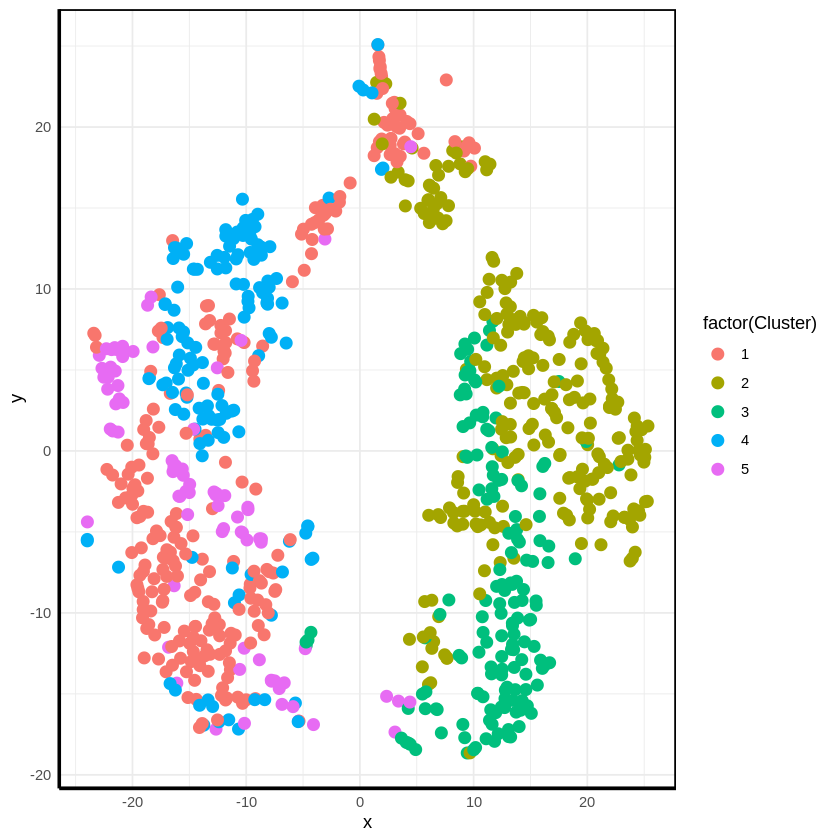

In [36]:
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(true_label['Cluster']) %>%
  ggplot(aes(x = x, y = y, color = factor(Cluster))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "anti_label.svg", plot = tsne_plot, device = "svg", dpi = 500)

Saving 6.67 x 6.67 in image


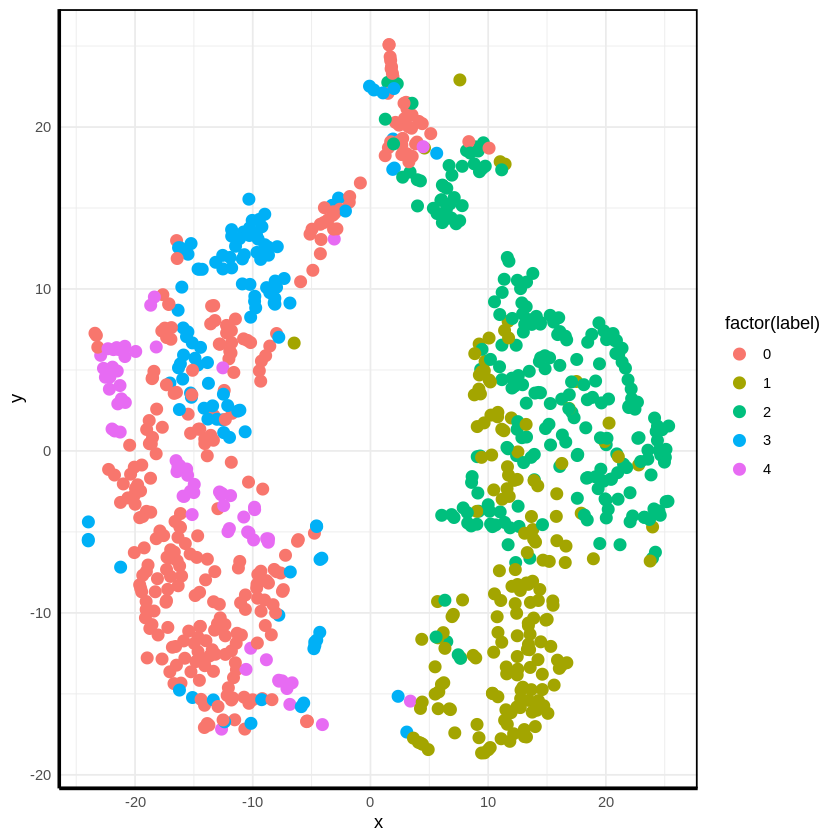

In [37]:
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_scvag['label']) %>%
  ggplot(aes(x = x, y = y, color = factor(label))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "anti_scVAG.svg", plot = tsne_plot, device = "svg", dpi = 500)

Saving 6.67 x 6.67 in image


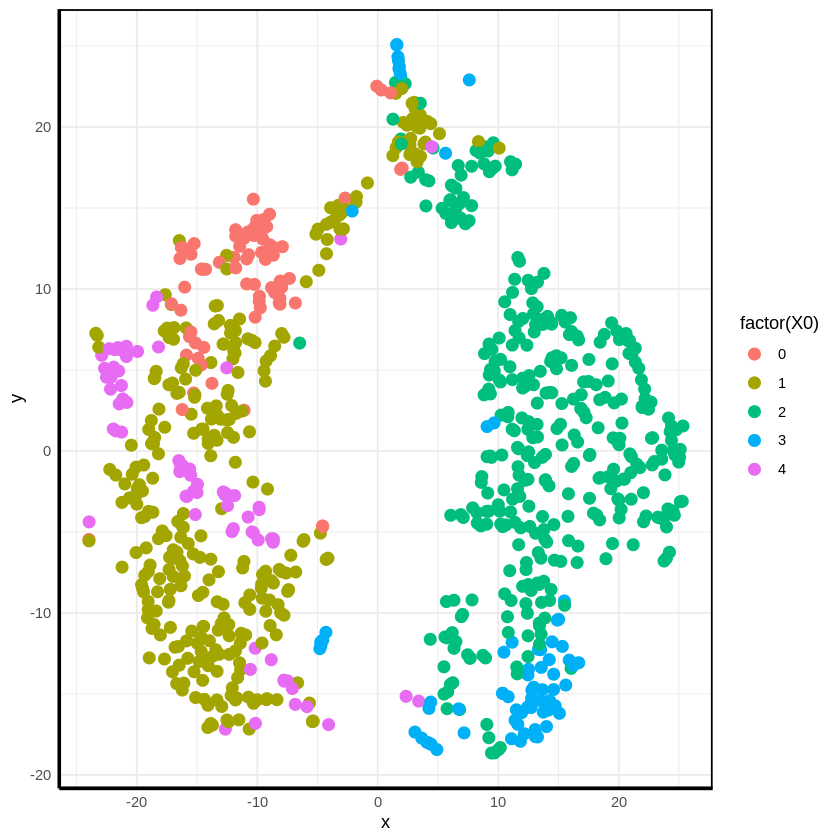

In [40]:
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_scASGC['X0']) %>%
  ggplot(aes(x = x, y = y, color = factor(X0))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "anti_scASGC.svg", plot = tsne_plot, device = "svg", dpi = 500)

Saving 6.67 x 6.67 in image


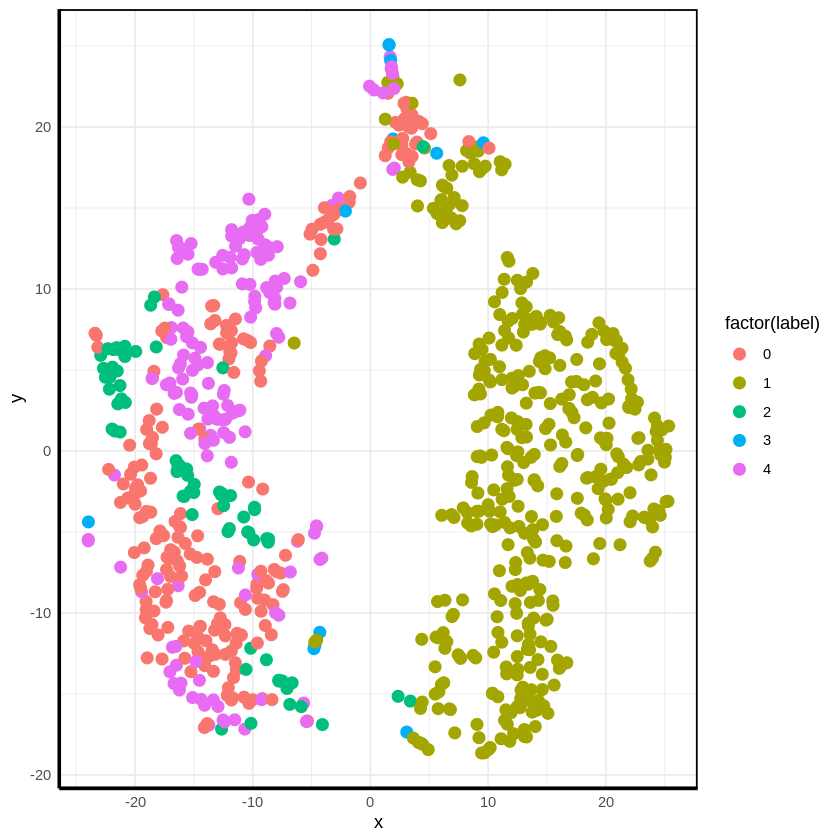

In [41]:
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_scgac['label']) %>%
  ggplot(aes(x = x, y = y, color = factor(label))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "anti_scGAC.svg", plot = tsne_plot, device = "svg", dpi = 500)

Saving 6.67 x 6.67 in image


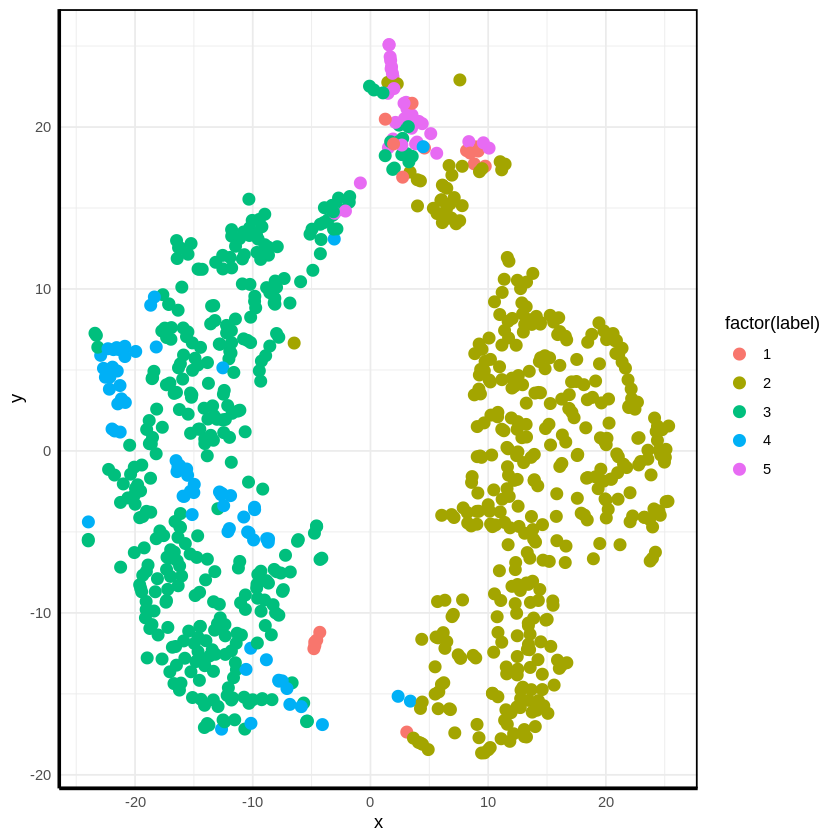

In [42]:
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_sc3['label']) %>%
  ggplot(aes(x = x, y = y, color = factor(label))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "anti_SC3.svg", plot = tsne_plot, device = "svg", dpi = 500)

Saving 6.67 x 6.67 in image


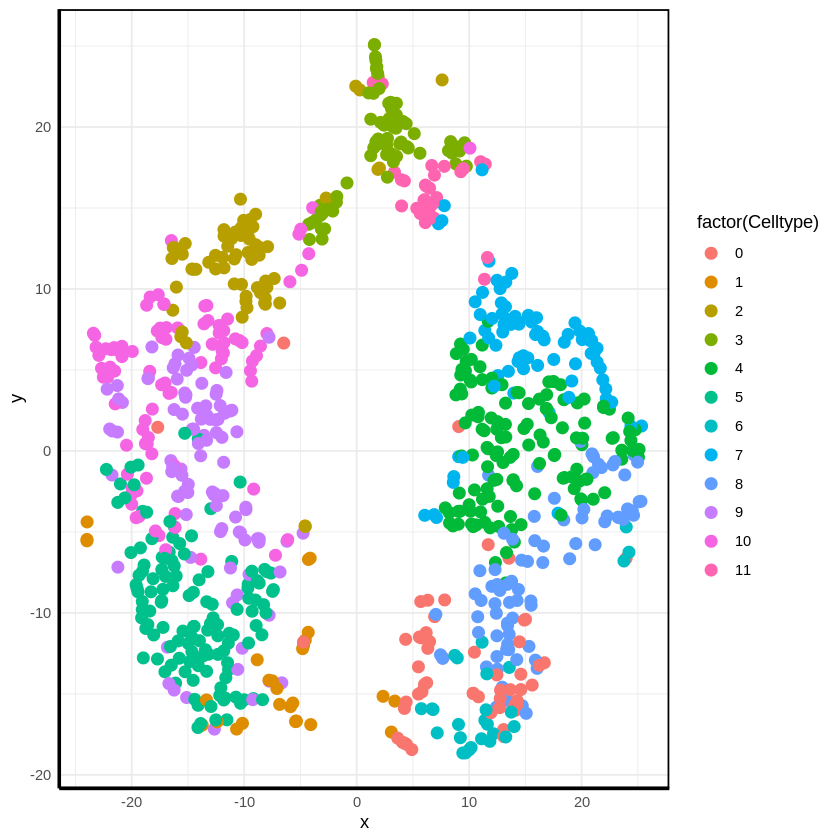

In [43]:
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_scgnn['Celltype']) %>%
  ggplot(aes(x = x, y = y, color = factor(Celltype))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "anti_scGNN.svg", plot = tsne_plot, device = "svg", dpi = 500)

Saving 6.67 x 6.67 in image


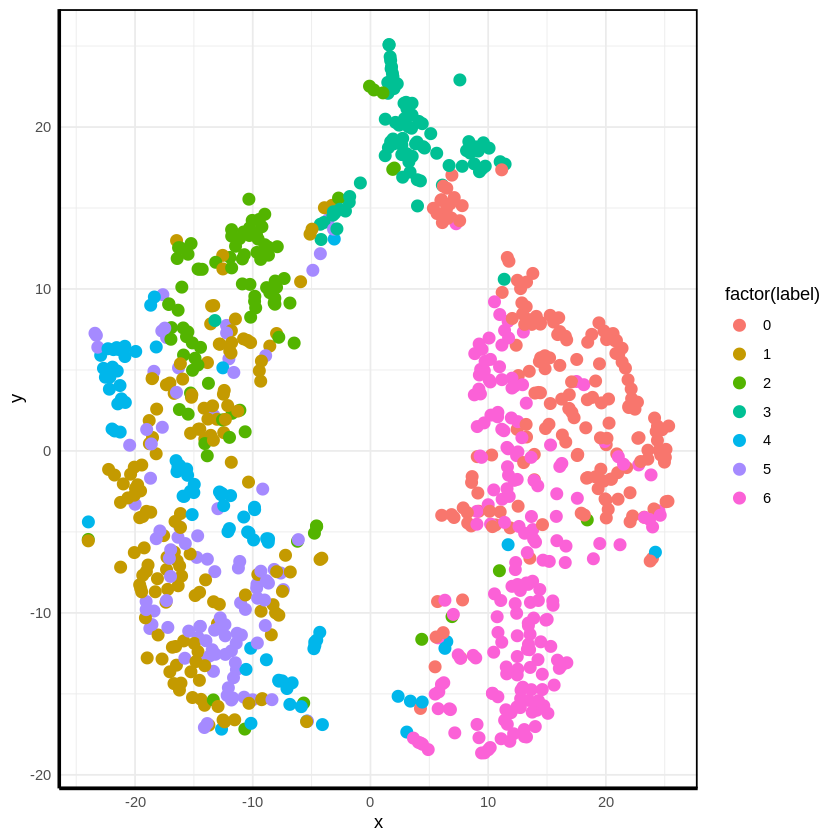

In [44]:
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_desc['label']) %>%
  ggplot(aes(x = x, y = y, color = factor(label))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "anti_DESC.svg", plot = tsne_plot, device = "svg", dpi = 500)

Saving 6.67 x 6.67 in image


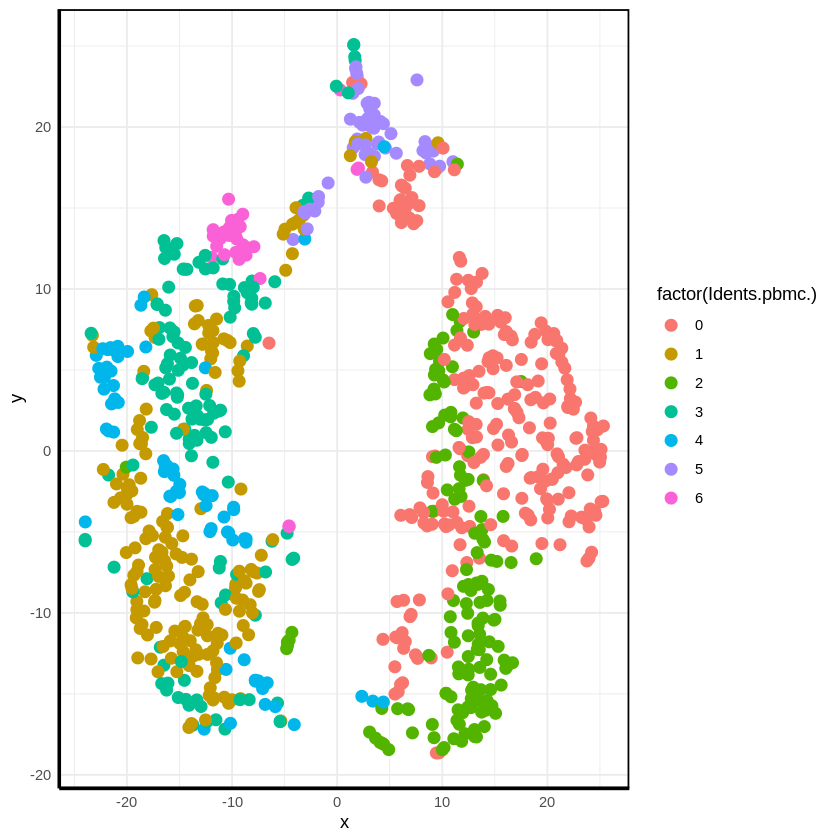

In [45]:
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_seurat['Idents.pbmc.']) %>%
  ggplot(aes(x = x, y = y, color = factor(Idents.pbmc.))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "anti_Seurat.svg", plot = tsne_plot, device = "svg", dpi = 500)